In [3]:
import os
import sys
import lightning as L
import torch
from lightning import LightningModule
import matplotlib.pyplot as plt
import numpy as np

In [4]:
sys.path.append(os.path.abspath(os.path.join('..')))
from src.models.components.basic import Basic

data_loc = "../data/VAE000_lattice"

In [8]:
model = Basic()
model.load_state_dict(torch.load("model_lattice.pt"))
model.eval()

Basic(
  (fc1): Linear(in_features=32768, out_features=400, bias=True)
  (fc21): Linear(in_features=400, out_features=20, bias=True)
  (fc22): Linear(in_features=400, out_features=20, bias=True)
  (fc3): Linear(in_features=16404, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=16384, bias=True)
  (elu): ELU(alpha=1.0)
  (sigmoid): Sigmoid()
)

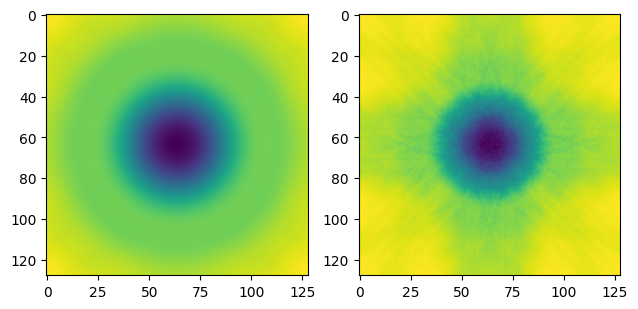

In [21]:
folder = np.random.choice(os.listdir(data_loc))
input_img = np.clip(np.load(os.path.join(data_loc, folder, "Input.npy")), 0.0, 1.0)
output_img = np.clip(np.load(os.path.join(data_loc, folder, "Output.npy")), 0.0, 1.0)

input_img = torch.from_numpy(input_img).float().clone().detach().view(1, -1)

prediction = model.decode(torch.rand(1, model.latent_dims), input_img)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(output_img.reshape((128, 128)))
axs[1].imshow(prediction.detach().numpy().reshape((128, 128)))

plt.tight_layout()
plt.show()